## Sistema Lotka-Volterra
### Modelo depredador-presa 

En un modelo Lotka-Volterra es basada en las sigueintes supuestos:
- Solo existen 2 especies, 1 para el depredador y 1 para la presa
- la tasa de variación de la población es directamente proporcional a su tamaño
- la especie depredadora depende totalmente de la especie presa como único suministro de alimento
- no hay limitacion de alimentamiento para la presa

El modelo de depredaro presa es un sistema de 2 ecuaciones diferenciales ordinarias:

$$ \frac{ dx }{ dt } = \alpha x - \beta xy$$

$$ \frac{dy}{dt} = \delta xy - \gamma y$$

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
""" alpha, beta, delta, gamma = 0.05, 0.01, 0.01, 0.05 """

' alpha, beta, delta, gamma = 0.05, 0.01, 0.01, 0.05 '

In [3]:
alpha, beta, delta, gamma = 0.1, 0.02, 0.01, 0.1  # alpha: tasa de crecimiento de presas, beta: tasa de depredación, 
                                                  # delta: tasa de crecimiento de depredadores, gamma: tasa de muerte de depredadores


In [4]:
num_generations = 400     # Número de generaciones del Algoritmo Genético 
population_size = 50      # Tamaño de la población 
mutation_rate = 0.1       # Tasa de mutación 
num_parents = 10          # Número de padres seleccionados para el cruzamiento en cada generación


In [5]:
class Individual:
    def __init__(self, speed, evasion):
        self.speed = speed          # Atributo 'speed': representa la velocidad del individuo
        self.evasion = evasion      # Atributo 'evasion': representa la capacidad de evasión del individuo
        self.fitness = 0            # Atributo 'fitness': valor de aptitud (inicialmente 0), indica qué tan bueno es el individuo


In [6]:
def fitness_function(prey_population, predator_population, individual):
    # Asegurarse de que la evasión y la velocidad no sean negativas
    evasion = max(individual.evasion, 0)
    speed = max(individual.speed, 0)
    
    fitness = prey_population * evasion - predator_population * speed
    return max(fitness, 0)


In [7]:
def initialize_population(size):
    # Crea una población inicial de individuos con velocidad y evasión aleatorias
    return [Individual(speed=random.uniform(0.5, 1.5), evasion=random.uniform(0.5, 1.5)) for _ in range(size)]

In [8]:
def select_parents(population):
    # Ordena la población de individuos en función de su aptitud (fitness) en orden descendente
    population.sort(key=lambda x: x.fitness, reverse=True)
    
    # Selecciona los primeros 'num_parents' individuos como padres para la siguiente generación
    return population[:num_parents]


In [9]:
def crossover(parent1, parent2):
    # Crea el primer hijo tomando la velocidad del padre 1 y la evasión del padre 2
    child1 = Individual(speed=parent1.speed, evasion=parent2.evasion)
    
    # Crea el segundo hijo tomando la velocidad del padre 2 y la evasión del padre 1
    child2 = Individual(speed=parent2.speed, evasion=parent1.evasion)
    
    # Devuelve los dos hijos generados
    return child1, child2


In [10]:
def mutate(individual):
    # Aplica la mutación al individuo con una probabilidad definida por 'mutation_rate'
    if random.random() < mutation_rate:
        # Modifica el atributo 'speed' agregando un valor aleatorio entre -0.1 y 0.1
        individual.speed += random.uniform(-0.1, 0.1)
        
        # Modifica el atributo 'evasion' agregando un valor aleatorio entre -0.1 y 0.1
        individual.evasion += random.uniform(-0.1, 0.1)
    
    
    return individual


In [11]:
prey_population = 40
predator_population = 10
prey_history, predator_history = [], []

In [12]:
population = initialize_population(population_size)
print(population_size)
print(len(population))

50
50


### Algoritmo genérico y simulación Lotka-Volterra
#### Condiciones ideales

In [13]:
# Diccionario para almacenar speed, evasion y fitness por generación
population_data = {}
print(population_size)
print(f"population inicial {len(population)}")
for generation in range(num_generations):

    for individual in population:
        print(f"individual speed {individual.speed}")
        print(f"individual evasion {individual.evasion}")
        individual.fitness = fitness_function(prey_population, predator_population, individual)
        print(f"individual fitness {individual.fitness}")
    
    # Selección de los mejores individuos
    parents = select_parents(population)
    
    # Crear nueva generación mediante cruce y mutación
    next_generation = []
    for i in range(0, num_parents, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    print(f"next generation size {len(next_generation)}")
    
    # Añadir hijos mutados a la población y eliminar los menos aptos
    for u in population:
        print(f"fitness {u.fitness}")
        print(f"evasion {u.evasion}")
    population = parents + next_generation
    print(f"parents + next {len(population)}")
    
    population = sorted(population, key=lambda x: x.fitness, reverse=True)[:population_size]
    print(f"sorted {len(population)}")

    # Simulación de un paso de Lotka-Volterra
    prey_population += alpha * prey_population - beta * prey_population * predator_population
    print(f"prey population {prey_population}")
    predator_population += delta * prey_population * predator_population - gamma * predator_population
    print(f"predator population {prey_population} \n")

    # Guardar historia de poblaciones
    prey_history.append(prey_population)
    predator_history.append(predator_population)
    
    # Guardar datos de los primeros 5 individuos en el diccionario
    population_data[generation] = {
        "speed": [ind.speed for ind in population[:5]],
        "evasion": [ind.evasion for ind in population[:5]],
        "fitness": [ind.fitness for ind in population[:5]],
    }

50
population inicial 50
individual speed 0.6119029482077364
individual evasion 1.1560883746832427
individual fitness 40.124505505252344
individual speed 0.7801828990567606
individual evasion 1.4472915825060277
individual fitness 50.0898343096735
individual speed 0.5585175353796566
individual evasion 1.4284057074008474
individual fitness 51.55105294223733
individual speed 1.3279068174976276
individual evasion 1.4187216683114918
individual fitness 43.4697985574834
individual speed 1.0421553814128701
individual evasion 1.1221102356005548
individual fitness 34.462855609893495
individual speed 1.0278004644981595
individual evasion 0.534186673798643
individual fitness 11.089462306964126
individual speed 0.8483653413706247
individual evasion 1.0213778108134235
individual fitness 32.37145901883069
individual speed 0.7598593048574844
individual evasion 0.7405311797373314
individual fitness 22.022654140918412
individual speed 1.1241456407980066
individual evasion 0.8401861497617751
individual f

In [14]:
population_data

{0: {'speed': [0.5585175353796566,
   0.7801828990567606,
   0.7032237266756158,
   1.1694891647850532,
   1.4223780724547004],
  'evasion': [1.4284057074008474,
   1.4472915825060277,
   1.3487460464271022,
   1.4644727553311259,
   1.493790632906805],
  'fitness': [51.55105294223733,
   50.0898343096735,
   46.917604590327926,
   46.884018565394506,
   45.52784459172519]},
 1: {'speed': [0.5585175353796566,
   0.5585175353796566,
   0.7032237266756158,
   0.7801828990567606,
   0.7801828990567606],
  'evasion': [1.4472915825060277,
   1.4284057074008474,
   1.4644727553311259,
   1.4472915825060277,
   1.4284057074008474],
  'fitness': [45.06517602443332,
   44.38528452064683,
   43.860400235807774,
   42.27219244210181,
   41.59230093831532]},
 2: {'speed': [0.5585175353796566,
   0.5585175353796566,
   0.6119029482077364,
   0.6091182529909516,
   0.5585175353796566],
  'evasion': [1.4472915825060277,
   1.4472915825060277,
   1.4644727553311259,
   1.4628987483610159,
   1.4284057

In [15]:
# Función para detectar picos (altos y bajos) basados en cambios de dirección
def find_peaks(data):
    peaks = []
    
    # Recorrer los datos desde el segundo hasta el penúltimo elemento
    for i in range(1, len(data) - 1):
        # Detectamos picos altos (máximos locales)
        if data[i-1] < data[i] > data[i+1]:
            peaks.append(i)
        # Detectamos picos bajos (mínimos locales)
        elif data[i-1] > data[i] < data[i+1]:
            peaks.append(i)
    
    return peaks

# Guardar los picos en tablas separadas para presas y depredadores
def save_peaks_to_dataframe(peaks, population_history):
    # Generar lista de valores para la tabla
    rows = []
    generations = range(len(population_history))  # Generamos las generaciones automáticamente
    for peak in peaks:
        # Guardamos la generación, la población y otros datos relevantes
        rows.append([generations[peak], population_history[peak]])

    # Crear DataFrame
    df_peaks = pd.DataFrame(rows, columns=["generation", "population_size"])
    return df_peaks

# Suponiendo que tienes las siguientes listas de historia de poblaciones:
prey_peaks = find_peaks(prey_history)
predator_peaks = find_peaks(predator_history)

# Generar las tablas con los picos de presas y depredadores
df_prey_peaks = save_peaks_to_dataframe(prey_peaks, prey_history)
df_predator_peaks = save_peaks_to_dataframe(predator_peaks, predator_history)

In [16]:
# Mostrar la tabla resultante (presas)
df_prey_peaks

generation  population_size
0          22         0.790453
1          78        42.938751
2         103         0.790052
3         160        42.832438
4         184         0.790210
5         241        42.951550
6         265         0.790943
7         322        42.974576
8         347         0.790268

In [17]:
# Mostrar la tabla resultante (depredadores)
df_predator_peaks

generation  population_size
0           4        19.411077
1          58         0.345157
2          86        19.390816
3         139         0.345414
4         167        19.438632
5         221         0.345231
6         248        19.439636
7         302         0.345109
8         329        19.389701
9         383         0.345214

In [18]:
# Función para calcular promedios
def calculate_averages(generations, population_data):
    averages = []
    for gen in generations:
        if gen in population_data:
            avg_speed = np.mean(population_data[gen]["speed"])
            avg_evasion = np.mean(population_data[gen]["evasion"])
            avg_fitness = np.mean(population_data[gen]["fitness"])
            averages.append([avg_speed, avg_evasion, avg_fitness])
        else:
            averages.append([None, None, None])  # Si no hay datos, se deja vacío
    return averages

# Calcular promedios para los picos de presas y depredadores
prey_averages = calculate_averages(df_prey_peaks["generation"].values, population_data)
predator_averages = calculate_averages(df_predator_peaks["generation"].values, population_data)

# Agregar promedios a los DataFrames
df_prey_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = prey_averages
df_predator_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = predator_averages

In [19]:
df_prey_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0          22         0.790453   0.509083     1.495428     0.000000
1          78        42.938751   0.295802     2.181336    90.718380
2         103         0.790052  -0.054651     2.389180     1.895894
3         160        42.832438  -0.021396     3.107985   133.062963
4         184         0.790210  -0.132258     3.505748     2.790252
5         241        42.951550  -0.123657     4.289843   182.833841
6         265         0.790943  -0.250954     4.548082     3.633622
7         322        42.974576  -0.506503     5.461340   231.315833
8         347         0.790268  -0.502567     5.610180     4.444772

In [20]:
df_predator_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0           4        19.411077   0.552089     1.460003    16.338190
1          58         0.345157   0.349884     1.958199    16.750761
2          86        19.390816   0.166558     2.294757    30.055212
3         139         0.345414  -0.058332     2.899075    24.383641
4         167        19.438632  -0.141856     3.221111    51.029599
5         221         0.345231  -0.070847     4.043387    36.285703
6         248        19.439636  -0.102250     4.403491    76.029722
7         302         0.345109  -0.331948     5.141699    45.041797
8         329        19.389701  -0.528631     5.513365   103.546722
9         383         0.345214  -0.620057     6.128866    52.409571

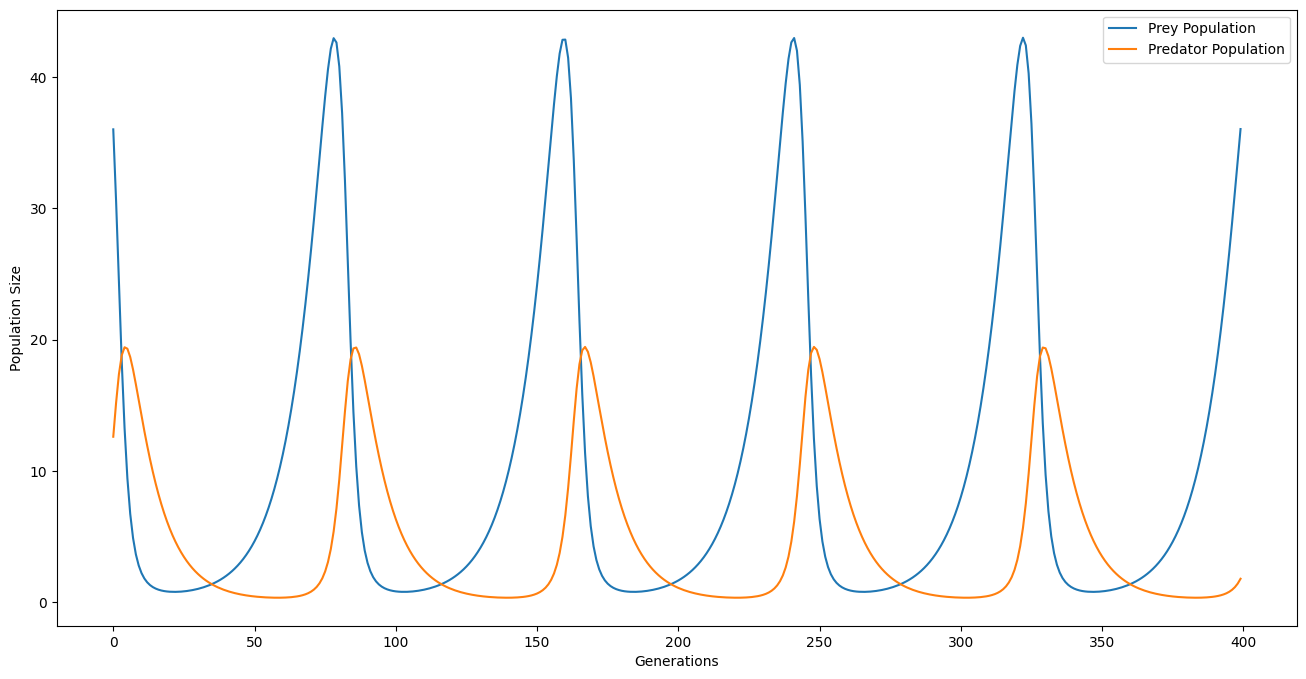

In [21]:
# Graficar los resultados
fig, ax = plt.subplots()
plt.plot(prey_history, label="Prey Population")
plt.plot(predator_history, label="Predator Population")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()
fig.set_size_inches(16,8)
plt.show()

#### Modelo de saturación

In [22]:
# Parámetros para el modelo de saturación
r = 0.1       # Tasa de crecimiento de las presas
K = 100       # Límite de capacidad de las presas
a = 0.01      # Ineficiencia de la población de presas
c = 0.1       # Tasa de mortalidad de los depredadores
d = 0.01      # Eficiencia de caza del depredador

# Diccionario para almacenar speed, evasion y fitness
generation_data = {}

print(population_size)
print(f"population inicial {len(population)}")
for generation in range(num_generations):
    for individual in population:
        print(f"individual speed {individual.speed}")
        print(f"individual evasion {individual.evasion}")
        individual.fitness = fitness_function(prey_population, predator_population, individual)
        print(f"individual fitness {individual.fitness}")
    
    # Selección de los mejores individuos
    parents = select_parents(population)
    
    # Crear nueva generación mediante cruce y mutación
    next_generation = []
    for i in range(0, num_parents, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    print(f"next generation size {len(next_generation)}")
    
    # Añadir hijos mutados a la población y eliminar los menos aptos
    for u in population:
        print(f"fitness {u.fitness}")
        print(f"evasion {u.evasion}")
    population = parents + next_generation
    print(f"parents + next {len(population)}")
    
    population = sorted(population, key=lambda x: x.fitness, reverse=True)[:population_size]
    print(f"sorted {len(population)}")

    # Simulación de un paso del modelo de saturación
    prey_population += r * prey_population * (1 - prey_population / K) - a * prey_population * predator_population
    print(f"prey population {prey_population}")
    predator_population += d * prey_population * predator_population - c * predator_population
    print(f"predator population {prey_population} \n")

    # Guardar historia de poblaciones
    prey_history.append(prey_population)
    predator_history.append(predator_population)
    
    # Guardar datos de los primeros 5 individuos en el diccionario
    generation_data[generation] = {
        "speed": [ind.speed for ind in population[:5]],
        "evasion": [ind.evasion for ind in population[:5]],
        "fitness": [ind.fitness for ind in population[:5]],
    }

50
population inicial 20
individual speed -0.4295754008667452
individual evasion 6.441363017312837
individual fitness 232.02896894646483
individual speed -0.42423277097771783
individual evasion 6.441363017312837
individual fitness 232.02896894646483
individual speed -0.42423277097771783
individual evasion 6.355991196501415
individual fitness 228.95372920190835
individual speed -0.4873022927156381
individual evasion 6.355991196501415
individual fitness 228.95372920190835
individual speed -0.42423277097771783
individual evasion 6.355991196501415
individual fitness 228.95372920190835
individual speed -0.4873022927156381
individual evasion 6.355991196501415
individual fitness 228.95372920190835
individual speed -0.42423277097771783
individual evasion 6.355991196501415
individual fitness 228.95372920190835
individual speed -0.4873022927156381
individual evasion 6.355991196501415
individual fitness 228.95372920190835
individual speed -0.4873022927156381
individual evasion 6.355991196501415
i

In [23]:
generation_data

{0: {'speed': [-0.4295754008667452,
   -0.42423277097771783,
   -0.4295754008667452,
   -0.42423277097771783,
   -0.42423277097771783],
  'evasion': [6.441363017312837,
   6.441363017312837,
   6.441363017312837,
   6.441363017312837,
   6.355991196501415],
  'fitness': [232.02896894646483,
   232.02896894646483,
   232.02896894646483,
   232.02896894646483,
   228.95372920190835]},
 1: {'speed': [-0.4295754008667452,
   -0.42423277097771783,
   -0.4295754008667452,
   -0.42423277097771783,
   -0.4295754008667452],
  'evasion': [6.441363017312837,
   6.441363017312837,
   6.441363017312837,
   6.441363017312837,
   6.441363017312837],
  'fitness': [242.72267218441692,
   242.72267218441692,
   242.72267218441692,
   242.72267218441692,
   242.72267218441692]},
 2: {'speed': [-0.4295754008667452,
   -0.42423277097771783,
   -0.4295754008667452,
   -0.42423277097771783,
   -0.4295754008667452],
  'evasion': [6.441363017312837,
   6.441363017312837,
   6.441363017312837,
   6.441363017312

In [24]:
# Calcular promedios para los picos de presas y depredadores
prey_averages = calculate_averages(df_prey_peaks["generation"].values, generation_data)
predator_averages = calculate_averages(df_predator_peaks["generation"].values, generation_data)

# Agregar promedios a los DataFrames
df_prey_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = prey_averages
df_predator_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = predator_averages

In [25]:
df_predator_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0           4        19.411077  -0.417314     6.448075   265.982256
1          58         0.345157  -0.030397     7.198888    46.739682
2          86        19.390816  -0.079270     7.554706   200.000162
3         139         0.345414   0.026730     8.325893    96.870651
4         167        19.438632  -0.100373     8.793459    89.376802
5         221         0.345231  -0.289606     9.560829   164.915285
6         248        19.439636  -0.429298     9.893804    59.096886
7         302         0.345109  -0.366238    10.634665   118.625255
8         329        19.389701  -0.275085    11.079766    83.215999
9         383         0.345214  -0.509886    11.730696    91.383141

In [26]:
df_prey_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0          22         0.790453  -0.384766     6.652527    16.561663
1          78        42.938751  -0.019360     7.466249   185.875711
2         103         0.790052  -0.025931     7.762964    29.117988
3         160        42.832438  -0.113922     8.671040   158.427198
4         184         0.790210  -0.110299     8.990877    40.157196
5         241        42.951550  -0.426230     9.774474    75.363799
6         265         0.790943  -0.421734    10.134348    75.023299
7         322        42.974576  -0.282764    11.051808    75.417856
8         347         0.790268  -0.280396    11.191010   134.234401

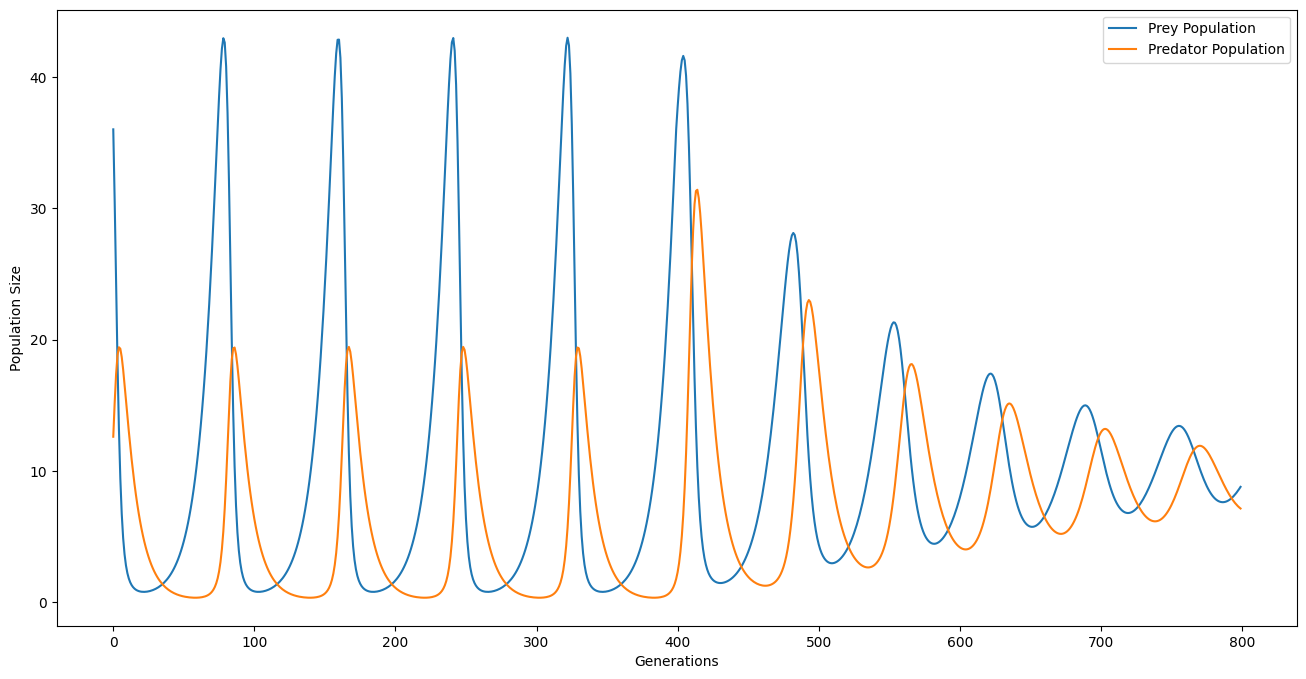

In [27]:
# Graficar los resultados
fig, ax = plt.subplots()
plt.plot(prey_history, label="Prey Population")
plt.plot(predator_history, label="Predator Population")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()
fig.set_size_inches(16, 8)
plt.show()

#### Control para un sistema depredador-presa


In [28]:
# Parámetros para el modelo de saturación
r = 0.1       # Tasa de crecimiento de las presas
K = 100       # Límite de capacidad de las presas
a = 0.01      # Ineficiencia de la población de presas
c = 0.1       # Tasa de mortalidad de los depredadores
d = 0.01      # Eficiencia de caza del depredador
u1 = 0.5
u2 = -0.5

# Diccionario para almacenar speed, evasion y fitness
generation2_data = {}

print(population_size)
print(f"population inicial {len(population)}")
for generation in range(num_generations):
    for individual in population:
        print(f"individual speed {individual.speed}")
        print(f"individual evasion {individual.evasion}")
        individual.fitness = fitness_function(prey_population, predator_population, individual)
        print(f"individual fitness {individual.fitness}")
    
    # Selección de los mejores individuos
    parents = select_parents(population)
    
    # Crear nueva generación mediante cruce y mutación
    next_generation = []
    for i in range(0, num_parents, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    print(f"next generation size {len(next_generation)}")
    
    # Añadir hijos mutados a la población y eliminar los menos aptos
    for u in population:
        print(f"fitness {u.fitness}")
        print(f"evasion {u.evasion}")
    population = parents + next_generation
    print(f"parents + next {len(population)}")
    
    population = sorted(population, key=lambda x: x.fitness, reverse=True)[:population_size]
    print(f"sorted {len(population)}")

    # Simulación de un paso del modelo de saturación
    prey_population += r * prey_population * (1 - prey_population / K) - a * prey_population * predator_population + u1
    print(f"prey population {prey_population}")
    predator_population += d * prey_population * predator_population - c * predator_population + u2
    print(f"predator population {prey_population} \n")

    # Guardar historia de poblaciones
    prey_history.append(prey_population)
    predator_history.append(predator_population)
    
    # Guardar datos de los primeros 5 individuos en el diccionario
    generation2_data[generation] = {
        "speed": [ind.speed for ind in population[:5]],
        "evasion": [ind.evasion for ind in population[:5]],
        "fitness": [ind.fitness for ind in population[:5]],
    }

50
population inicial 20
individual speed -0.41875123887886845
individual evasion 11.899736348586314
individual fitness 104.52863555123125
individual speed -0.5841212444498918
individual evasion 11.899736348586314
individual fitness 104.52863555123125
individual speed -0.5841212444498918
individual evasion 11.84915392419896
individual fitness 104.08431379071497
individual speed -0.4744718980020981
individual evasion 11.84915392419896
individual fitness 104.08431379071497
individual speed -0.5841212444498918
individual evasion 11.84915392419896
individual fitness 104.08431379071497
individual speed -0.4744718980020981
individual evasion 11.84915392419896
individual fitness 104.08431379071497
individual speed -0.5841212444498918
individual evasion 11.84915392419896
individual fitness 104.08431379071497
individual speed -0.5841212444498918
individual evasion 11.84915392419896
individual fitness 104.08431379071497
individual speed -0.4744718980020981
individual evasion 11.84915392419896
in

In [29]:
generation2_data

{0: {'speed': [-0.41875123887886845,
   -0.5841212444498918,
   -0.41875123887886845,
   -0.5841212444498918,
   -0.5232302651220126],
  'evasion': [11.899736348586314,
   11.899736348586314,
   11.899736348586314,
   11.899736348586314,
   11.850498867353163],
  'fitness': [104.52863555123125,
   104.52863555123125,
   104.52863555123125,
   104.52863555123125,
   104.09612792412807]},
 1: {'speed': [-0.41875123887886845,
   -0.5841212444498918,
   -0.41875123887886845,
   -0.5841212444498918,
   -0.41875123887886845],
  'evasion': [11.899736348586314,
   11.899736348586314,
   11.899736348586314,
   11.899736348586314,
   11.899736348586314],
  'fitness': [112.5517768644944,
   112.5517768644944,
   112.5517768644944,
   112.5517768644944,
   112.5517768644944]},
 2: {'speed': [-0.6783642808421247,
   -0.41875123887886845,
   -0.5841212444498918,
   -0.41875123887886845,
   -0.5841212444498918],
  'evasion': [11.937038273090717,
   11.899736348586314,
   11.899736348586314,
   11.899

In [30]:
# Calcular promedios para los picos de presas y depredadores
prey_averages = calculate_averages(df_prey_peaks["generation"].values, generation2_data)
predator_averages = calculate_averages(df_predator_peaks["generation"].values, generation2_data)

# Agregar promedios a los DataFrames
df_prey_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = prey_averages
df_predator_peaks[["avg_speed", "avg_evasion", "avg_fitness"]] = predator_averages

In [31]:
df_prey_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0          22         0.790453  -0.544377    12.205462   428.461969
1          78        42.938751  -0.526076    13.187265   396.167078
2         103         0.790052  -0.557713    13.661978   105.154132
3         160        42.832438  -0.667806    14.420202   148.199500
4         184         0.790210  -0.882006    14.767192   322.095572
5         241        42.951550  -1.133750    15.699623   255.649661
6         265         0.790943  -1.121671    16.030950   193.783485
7         322        42.974576  -1.095727    16.829835   243.065577
8         347         0.790268  -0.968693    17.116599   238.680866

In [32]:
df_predator_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0           4        19.411077  -0.546225    11.927095   141.187859
1          58         0.345157  -0.562668    12.872993   147.879101
2          86        19.390816  -0.540384    13.355785   227.839049
3         139         0.345414  -0.633498    14.071309   221.673008
4         167        19.438632  -0.628780    14.569223   209.677023
5         221         0.345231  -0.985348    15.400091   241.030504
6         248        19.439636  -1.063112    15.838008   184.873825
7         302         0.345109  -1.159712    16.584520   190.434818
8         329        19.389701  -1.119248    16.938436   284.670171
9         383         0.345214  -0.865282    17.602941   292.087119

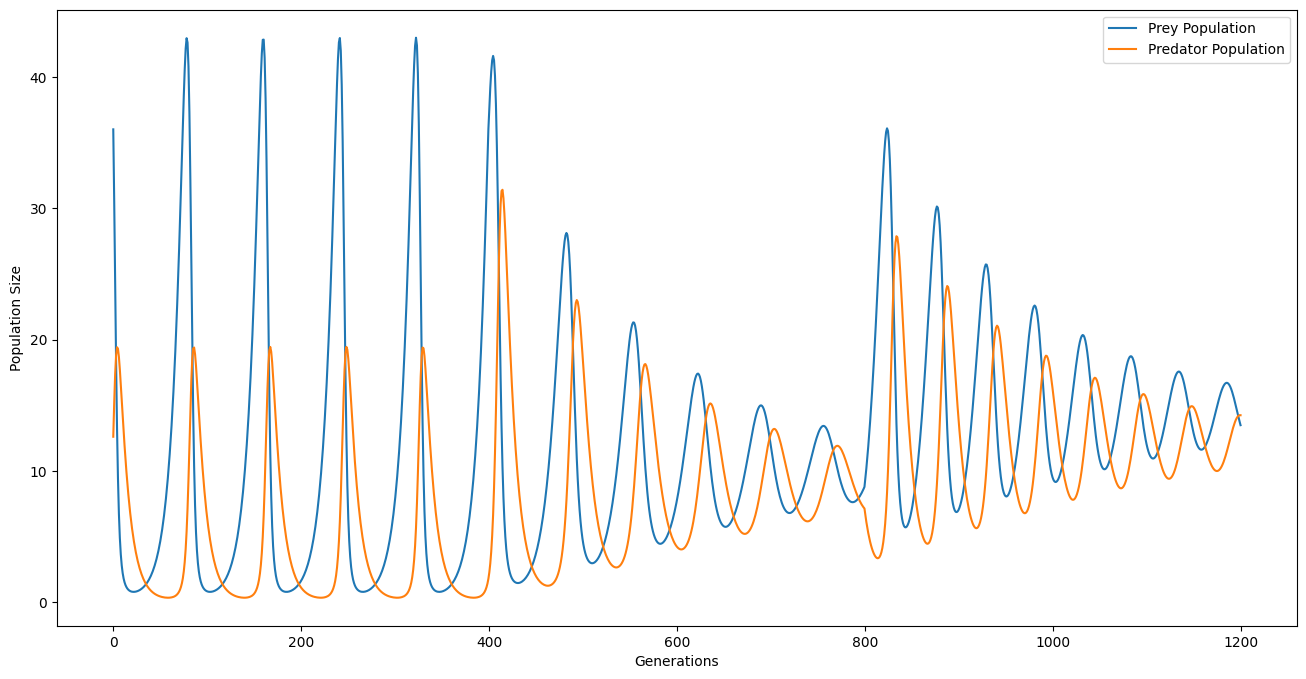

In [33]:
fig, ax = plt.subplots()
plt.plot(prey_history, label="Prey Population")
plt.plot(predator_history, label="Predator Population")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()
fig.set_size_inches(16, 8)
plt.show()

In [35]:
df_prey_peaks

generation  population_size  avg_speed  avg_evasion  avg_fitness
0          22         0.790453  -0.544377    12.205462   428.461969
1          78        42.938751  -0.526076    13.187265   396.167078
2         103         0.790052  -0.557713    13.661978   105.154132
3         160        42.832438  -0.667806    14.420202   148.199500
4         184         0.790210  -0.882006    14.767192   322.095572
5         241        42.951550  -1.133750    15.699623   255.649661
6         265         0.790943  -1.121671    16.030950   193.783485
7         322        42.974576  -1.095727    16.829835   243.065577
8         347         0.790268  -0.968693    17.116599   238.680866

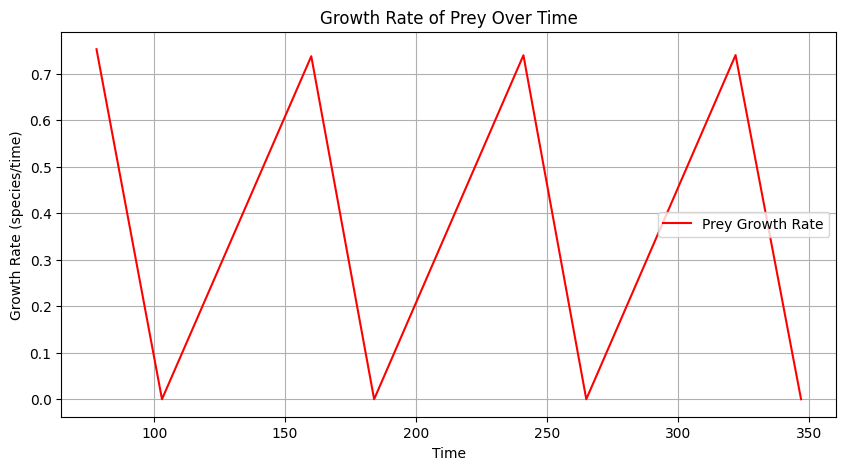

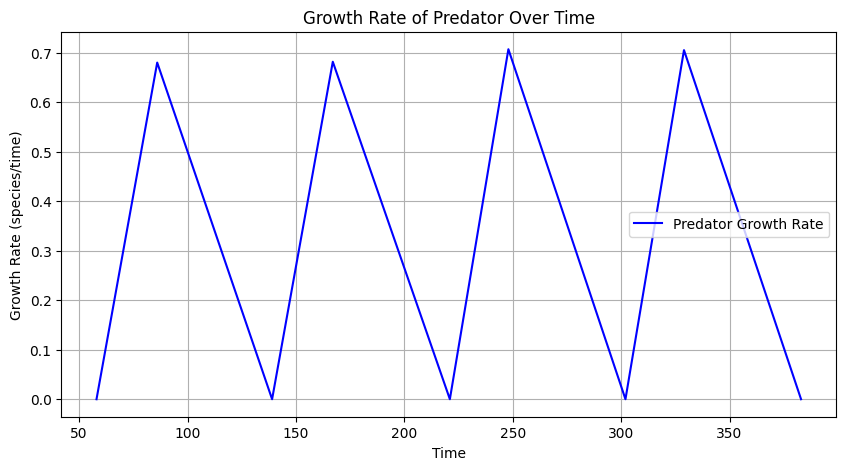

In [39]:
# Asegurarte de que no haya valores negativos en el growth rate
df_prey_peaks["growth_rate_prey"] = df_prey_peaks["population_size"].diff() / df_prey_peaks["generation"].diff()
df_predator_peaks["growth_rate_predator"] = df_predator_peaks["population_size"].diff() / df_predator_peaks["generation"].diff()

# Reemplazar valores negativos por 0
df_prey_peaks["growth_rate_prey"] = df_prey_peaks["growth_rate_prey"].clip(lower=0)
df_predator_peaks["growth_rate_predator"] = df_predator_peaks["growth_rate_predator"].clip(lower=0)

# Graficar la tasa de crecimiento de las presas (sin negativos)
plt.figure(figsize=(10, 5))
plt.plot(df_prey_peaks["generation"], df_prey_peaks["growth_rate_prey"], color="red", label="Prey Growth Rate")
plt.title("Growth Rate of Prey Over Time")
plt.xlabel("Time")
plt.ylabel("Growth Rate (species/time)")
plt.grid()
plt.legend()
plt.show()

# Graficar la tasa de crecimiento de los depredadores (sin negativos)
plt.figure(figsize=(10, 5))
plt.plot(df_predator_peaks["generation"], df_predator_peaks["growth_rate_predator"], color="blue", label="Predator Growth Rate")
plt.title("Growth Rate of Predator Over Time")
plt.xlabel("Time")
plt.ylabel("Growth Rate (species/time)")
plt.grid()
plt.legend()
plt.show()